In [1]:
import pandas as pd

In [1]:

# importing the required module
import matplotlib.pyplot as plt

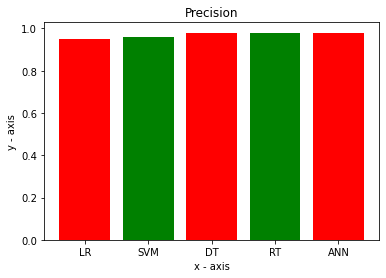

In [2]:
# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]
 
# heights of bars
height = [0.95,0.96,0.98,0.98,0.98]
 
# labels for bars
tick_label = ['LR', 'SVM', 'DT', 'RT', 'ANN']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
 
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Precision')
 
# function to show the plot
plt.show()

In [2]:
df_spark = pd.read_csv('df_spark.csv')

In [3]:
df_spark.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [4]:
df_spark = df_spark.drop(columns="Unnamed: 0")

In [5]:
df_spark.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


# X contains features and y contains label

In [6]:
y = df_spark.iloc[:,0].values
X = df_spark.iloc[:,1:].values

# dataset is split into 80:20 ratio. X_train contains 80% of the features, X_test contains 20% of the features and y_train contains 80% corresponding label of X_train and y_test contains 20% corresponding label of X_test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# 5-Fold Cross validation Estimation for Logistic Regression

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
for i in train_sizes:
    print(i)

In [ ]:
for i in train_mean:
    print(i)

In [ ]:
for i in test_mean:
    print(i)

# 5-Fold Cross validation Estimation for SVM

In [13]:
from sklearn.svm import LinearSVC

In [14]:
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', LinearSVC())])
train_sizes_svc, train_scores_svc, test_scores_svc = learning_curve(estimator=pipe_svc,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_svc = np.mean(train_scores_svc, axis=1)
train_std_svc = np.std(train_scores_svc, axis=1)
test_mean_svc = np.mean(test_scores_svc, axis=1)
test_std_svc = np.std(test_scores_svc, axis=1)

In [15]:
for i in train_mean_svc:
    print(i)

0.9826540946394273
0.981639601885804
0.9856668082951614
0.9823267752454372
0.9829803877744873


In [16]:
for i in test_mean_svc:
    print(i)

0.9603062688826753
0.9711907748218677
0.9774767477765417
0.9796111876180309
0.9825781652457415


# 5-Fold Cross validation Estimation for Decision Tree

In [17]:
from sklearn import tree

In [18]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', tree.DecisionTreeClassifier())])
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(estimator=pipe_tree,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_tree = np.mean(train_scores_tree, axis=1)
train_std_tree = np.std(train_scores_tree, axis=1)
test_mean_tree = np.mean(test_scores_tree, axis=1)
test_std_tree = np.std(test_scores_tree, axis=1)

In [19]:
for i in train_mean_tree:
    print(i)

0.9866876200453991
0.9884634188929631
0.9906874414327372
0.9928566751498378
0.9942169078616528


In [20]:
for i in test_mean_tree:
    print(i)

0.9694195125561589
0.8911130998614905
0.9801671313414516
0.9884115207121322
0.9934766133133899


# 5-Fold Cross validation Estimation for Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(n_estimators=10))])
train_sizes_rnd, train_scores_rnd, test_scores_rnd = learning_curve(estimator=pipe_rnd,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_rnd = np.mean(train_scores_rnd, axis=1)
train_std_rnd = np.std(train_scores_rnd, axis=1)
test_mean_rnd = np.mean(test_scores_rnd, axis=1)
test_std_rnd = np.std(test_scores_rnd, axis=1)

In [23]:
for i in train_mean_rnd:
    print(i)

0.9866806355858216
0.9884634188929631
0.9906874414327372
0.9928566751498378
0.9942169078616528


In [24]:
for i in test_mean_rnd:
    print(i)

0.9601637712924351
0.9384841676382127
0.9801755125563556
0.9885623841414066
0.9932195868400298


# 5-Fold Cross validation Estimation for ANN

In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [26]:
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', mlp)])
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(estimator=pipe_mlp,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_mlp = np.mean(train_scores_mlp, axis=1)
train_std_mlp = np.std(train_scores_mlp, axis=1)
test_mean_mlp = np.mean(test_scores_mlp, axis=1)
test_std_mlp = np.std(test_scores_mlp, axis=1)

In [27]:
for i in train_mean_mlp:
    print(i)

0.985339619346953
0.9879710144927536
0.9900728125672977
0.9914135174894468
0.9941638263396101


In [28]:
for i in test_mean_mlp:
    print(i)

0.9150305087344645
0.9029139603799254
0.9762279246286383
0.9843633560982139
0.9930882811268583


# Mean values of Training and Testing accuracies and Standard Deviation of Training and Testing accuracies are given below

In [29]:
np.mean(train_mean) , np.mean(train_mean_svc), np.mean(train_mean_tree), np.mean(train_mean_rnd), np.mean(train_mean_mlp)

(0.98701558378736,
 0.9830535335680635,
 0.990582412676518,
 0.9905810157846027,
 0.9897921580472122)

In [30]:
np.mean(train_std) , np.mean(train_std_svc), np.mean(train_std_tree), np.mean(train_std_rnd), np.mean(train_std_mlp)

(0.0019010371053188534,
 0.0028917520586866515,
 0.0018731735038651147,
 0.0018724149362768488,
 0.002748992366444652)

In [31]:
np.mean(test_mean) , np.mean(test_mean_svc), np.mean(test_mean_tree), np.mean(test_mean_rnd), np.mean(test_mean_mlp)

(0.9447813136832964,
 0.9742326288689714,
 0.9645175755569246,
 0.9721210844936881,
 0.95432480619362)

In [32]:
np.mean(test_std) , np.mean(test_std_svc), np.mean(test_std_tree), np.mean(test_std_rnd), np.mean(test_std_mlp)

(0.03346224583422917,
 0.00847991244105734,
 0.02622194999800583,
 0.01545321936600653,
 0.026923883589396635)

# Evaluation Metrics Calculations for Logisitic Regression

In [33]:
pipe_lr = pipe_lr.fit(X_train, y_train)

D:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
y_pred_train = pipe_lr.predict(X_train)

In [35]:
y_pred_test = pipe_lr.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_train, y_pred_train)

0.9885455662960273

In [38]:
accuracy_score(y_test, y_pred_test)

0.9881406361312493

In [39]:
from sklearn.metrics import classification_report

In [40]:
target_names = ['Normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']

In [41]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.96      0.65      0.78      4602
         DoSattack       1.00      0.59      0.74       279
              scan       0.98      0.96      0.97       720
  malitiousControl       0.97      0.48      0.64       650
malitiousOperation       0.90      0.47      0.62      1242
            spying       0.00      0.00      0.00       412
       dataProbing       0.90      1.00      0.95        94
        wrongSetUp       0.99      1.00      0.99    278353

          accuracy                           0.99    286352
         macro avg       0.84      0.64      0.71    286352
      weighted avg       0.99      0.99      0.99    286352



D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.95      0.66      0.78      1178
         DoSattack       1.00      0.57      0.73        63
              scan       0.98      0.97      0.98       169
  malitiousControl       0.99      0.50      0.67       155
malitiousOperation       0.88      0.41      0.56       305
            spying       0.00      0.00      0.00       120
       dataProbing       0.93      1.00      0.97        28
        wrongSetUp       0.99      1.00      0.99     69571

          accuracy                           0.99     71589
         macro avg       0.84      0.64      0.71     71589
      weighted avg       0.99      0.99      0.99     71589



D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.metrics import confusion_matrix
import itertools

In [44]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)

In [45]:
for i in cnf_matrix:
    for j in i:
        print(j, end='&')
    print()

775&0&0&0&0&0&0&403&
0&36&0&0&0&0&0&27&
0&0&164&0&0&0&0&5&
0&0&0&78&0&0&0&77&
5&0&2&0&126&0&2&170&
0&0&0&0&16&0&0&104&
0&0&0&0&0&0&28&0&
34&0&1&1&2&0&0&69533&


# Evaluation Metrics Calculations for SVM

In [46]:
pipe_svc = pipe_svc.fit(X_train, y_train)
y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)

D:\ana\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [47]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9826332625579706, 0.9827627149422398)

In [48]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.97      0.65      0.78      4602
         DoSattack       0.00      0.00      0.00       279
              scan       0.78      0.04      0.07       720
  malitiousControl       1.00      0.16      0.27       650
malitiousOperation       0.00      0.00      0.00      1242
            spying       0.00      0.00      0.00       412
       dataProbing       0.00      0.00      0.00        94
        wrongSetUp       0.98      1.00      0.99    278353

          accuracy                           0.98    286352
         macro avg       0.47      0.23      0.26    286352
      weighted avg       0.98      0.98      0.98    286352



D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.96      0.66      0.78      1178
         DoSattack       0.00      0.00      0.00        63
              scan       0.83      0.06      0.11       169
  malitiousControl       1.00      0.21      0.35       155
malitiousOperation       0.00      0.00      0.00       305
            spying       0.00      0.00      0.00       120
       dataProbing       0.00      0.00      0.00        28
        wrongSetUp       0.98      1.00      0.99     69571

          accuracy                           0.98     71589
         macro avg       0.47      0.24      0.28     71589
      weighted avg       0.98      0.98      0.98     71589



D:\ana\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
for i in cnf_matrix:
    for j in i:
        print(j, end='&')
    print()

775&0&0&0&0&0&0&403&
0&0&0&0&0&0&0&63&
0&0&10&0&0&0&0&159&
0&0&0&33&0&0&0&122&
0&0&2&0&0&0&0&303&
0&0&0&0&0&0&0&120&
0&0&0&0&0&0&0&28&
34&0&0&0&0&0&0&69537&


# Evaluation Metrics Calculations for Decision Tree

In [51]:
pipe_tree = pipe_tree.fit(X_train, y_train)
y_pred_train = pipe_tree.predict(X_train)
y_pred_test = pipe_tree.predict(X_test)

In [52]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942413532994356, 0.994119208258252)

In [53]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



In [54]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       1.00      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       1.00      1.00      1.00       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       1.00      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589



In [55]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
for i in cnf_matrix:
    for j in i:
        print(j, end='&')
    print()

775&0&0&0&0&0&0&403&
0&63&0&0&0&0&0&0&
0&0&169&0&0&0&0&0&
0&0&0&155&0&0&0&0&
0&0&0&0&305&0&0&0&
0&0&0&0&0&120&0&0&
0&0&0&0&0&0&28&0&
18&0&0&0&0&0&0&69553&


# Evaluation Metrics Calculations for Random Forest

In [56]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

In [57]:
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

In [58]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942413532994356, 0.994119208258252)

In [59]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



In [60]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       1.00      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       1.00      1.00      1.00       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       1.00      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589



In [61]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
for i in cnf_matrix:
    for j in i:
        print(j, end='&')
    print()

775&0&0&0&0&0&0&403&
0&63&0&0&0&0&0&0&
0&0&169&0&0&0&0&0&
0&0&0&155&0&0&0&0&
0&0&0&0&305&0&0&0&
0&0&0&0&0&120&0&0&
0&0&0&0&0&0&28&0&
18&0&0&0&0&0&0&69553&


# Evaluation Metrics Calculations for ANN

In [62]:
pipe_mlp = pipe_mlp.fit(X_train, y_train)
y_pred_train = pipe_mlp.predict(X_train)
y_pred_test = pipe_mlp.predict(X_test)

Iteration 1, loss = 0.05584959
Iteration 2, loss = 0.02541104
Iteration 3, loss = 0.01882284
Iteration 4, loss = 0.01670067
Iteration 5, loss = 0.01501241
Iteration 6, loss = 0.01462482
Iteration 7, loss = 0.01410045
Iteration 8, loss = 0.01378341
Iteration 9, loss = 0.01346050
Iteration 10, loss = 0.01328968


D:\ana\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [63]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942273844778454, 0.994077302378857)

In [64]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



In [1]:
# pickle.dump(pipe_mlp,open('MLP.sav', 'wb'))

In [66]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       0.99      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       0.98      1.00      0.99       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       0.99      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589



In [67]:
from sklearn.metrics import confusion_matrix
import itertools

In [68]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)

In [69]:
cnf_matrix

array([[  775,     0,     0,     0,     0,     0,     0,   403],
       [    0,    63,     0,     0,     0,     0,     0,     0],
       [    0,     0,   169,     0,     0,     0,     0,     0],
       [    0,     0,     0,   155,     0,     0,     0,     0],
       [    0,     0,     0,     0,   305,     0,     0,     0],
       [    0,     0,     0,     0,     0,   120,     0,     0],
       [    0,     0,     0,     0,     0,     0,    28,     0],
       [   18,     0,     1,     0,     0,     2,     0, 69550]],
      dtype=int64)

In [70]:
for i in cnf_matrix:
    for j in i:
        print(j, end=' ')
    print()

775 0 0 0 0 0 0 403 
0 63 0 0 0 0 0 0 
0 0 169 0 0 0 0 0 
0 0 0 155 0 0 0 0 
0 0 0 0 305 0 0 0 
0 0 0 0 0 120 0 0 
0 0 0 0 0 0 28 0 
18 0 1 0 0 2 0 69550 
